In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats

### Introduction
In this notebook we will be comparing between Adam optimization and normal stochastic gradient descent. We first set up the dataset below. (taken from http://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html)

The dataset used here is a very simple dataset with just one x feature to be mapped to one y value. Hence we will be fitting a straight line to it, leaving us with two parameters to optimize: the intercept and the slope. 

We can then visualize, using 3D plots:
* Cost versus the intercept and slope
* Path of gradient descent of our function along the 3D cost plot

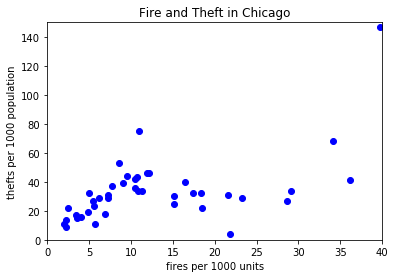

In [2]:
# loading and visualizing the data
data = np.loadtxt('fire.csv', delimiter=',')
x = data[:, 0]
y = data[:, 1]

plt.scatter(data[:, 0], data[:, 1], marker='o', c='b')
plt.title('Fire and Theft in Chicago')
plt.xlabel('fires per 1000 units')
plt.ylabel('thefts per 1000 population')
plt.xlim([0,40])
plt.ylim([0,150])
plt.show()

#### Getting the actual values of theta as a benchmark (using least squares regression):

In [3]:
actualvalues = stats.linregress(x,y)
print ("Actual values for theta are:")
print ("theta_0 =", actualvalues.intercept)
print ("theta_1 =", actualvalues.slope)

Actual values for theta are:
theta_0 = 16.9951572327
theta_1 = 1.31345600492


### Basic math

#### Equation of our straight line:

$h_\theta(x) = \theta_0 + \theta_1 x$

#### Equations when using batch gradient descent:
The cost function to be minimized:

$J(\theta_0,\theta_1) = {1 \over 2m} \sum\limits_{i=1}^m (h_\theta(x_i)-y_i)^2$

Gradients will be:

$\frac{\partial}{\partial \theta_0} J(\theta_0,\theta_1) = \frac{1}{m}  \sum\limits_{i=1}^m (h_\theta(x_i)-y_i)$

$\frac{\partial}{\partial \theta_1} J(\theta_0,\theta_1) = \frac{1}{m}  \sum\limits_{i=1}^m ((h_\theta(x_i)-y_i) \cdot x_i)$

#### Equations when using stochastic gradient descent:
The cost function to be minimized:

$J(\theta_0,\theta_1) = {1 \over 2} (h_\theta(x_i)-y_i)^2$

Gradients will be:

$\frac{\partial}{\partial \theta_0} J(\theta_0,\theta_1) = h_\theta(x_i)-y_i$

$\frac{\partial}{\partial \theta_1} J(\theta_0,\theta_1) = (h_\theta(x_i)-y_i) \cdot x_i$

We are doing stochastic gradient descent. Hence the gradients are defined without doing any summation across all the training examples, but per example.

In [4]:
# the equation of a straight line. where theta_0 is the intercept and theta_1 is the slope.
h = lambda theta_0, theta_1, x: theta_0 + theta_1*x

# the cost function (for the whole batch. for comparison later)
def J(x, y, theta_0, theta_1):
    m = len(x)
    returnValue = 0
    for i in range(m):
        returnValue += (h(theta_0, theta_1, x[i]) - y[i])**2
    returnValue = returnValue/(2*m)
    return returnValue

# finding the gradient per each training example
def grad_J(x, y, theta_0, theta_1):
    returnValue = np.array([0., 0.])
    returnValue[0] += (h(theta_0, theta_1, x) - y)
    returnValue[1] += (h(theta_0, theta_1, x) - y)*x
    return returnValue

### Our Adam Optimizer
Below is our Adam Optimizer class for our use later in gradient descent. It is made with reference to https://arxiv.org/pdf/1412.6980v8.pdf.

In [5]:
class AdamOptimizer:
    def __init__(self, weights, alpha=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.alpha = alpha
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.m = 0
        self.v = 0
        self.t = 0
        self.theta = weights
        
    def backward_pass(self, gradient):
        self.t = self.t + 1
        self.m = self.beta1*self.m + (1 - self.beta1)*gradient
        self.v = self.beta2*self.v + (1 - self.beta2)*(gradient**2)
        m_hat = self.m/(1 - self.beta1**self.t)
        v_hat = self.v/(1 - self.beta2**self.t)
        self.theta = self.theta - self.alpha*(m_hat/(np.sqrt(v_hat) - self.epsilon))
        return self.theta

### Setting some common variables

In [52]:
epochs = 15000
print_interval = 1000
m = len(x)
initial_theta = np.array([0., 0.]) # initial value of theta, before gradient descent
initial_cost = J(x, y, initial_theta[0], initial_theta[1])

### Stochastic gradient descent using Adam optimization

In [58]:
theta = initial_theta
adam_optimizer = AdamOptimizer(theta, alpha=0.001)
adam_history = [] # to plot out path of descent
adam_history.append(dict({'theta': theta, 'cost': initial_cost}))

for j in range(epochs):
    for i in range(m):
        gradients = grad_J(x[i], y[i], theta[0], theta[1])
        theta = adam_optimizer.backward_pass(gradients)
    
    if ((j+1)%print_interval == 0 or j==0):
        cost = J(x, y, theta[0], theta[1])
        print ('After {} epochs, Cost = {}, theta = {}'.format(j+1, cost, theta))
        adam_history.append(dict({'theta': theta, 'cost': cost}))
        
print ('\nFinal theta = {}'.format(theta))

After 1 epochs, Cost = 180.53769770119106, theta = [ 16.79397435   1.29269706]
After 1000 epochs, Cost = 180.41098870682305, theta = [ 16.92616942   1.31629583]
After 2000 epochs, Cost = 180.4102748710894, theta = [ 16.96813569   1.31409927]
After 3000 epochs, Cost = 180.4101593942188, theta = [ 16.98812748   1.31305286]
After 4000 epochs, Cost = 180.4101553488023, theta = [ 16.99765126   1.31255436]
After 5000 epochs, Cost = 180.41016498804862, theta = [ 17.00218827   1.31231688]
After 6000 epochs, Cost = 180.41017220504048, theta = [ 17.00434965   1.31220375]
After 7000 epochs, Cost = 180.41017623887035, theta = [ 17.00537931   1.31214985]
After 8000 epochs, Cost = 180.410178295747, theta = [ 17.00586983   1.31212418]
After 9000 epochs, Cost = 180.41017930630667, theta = [ 17.00610351   1.31211195]
After 10000 epochs, Cost = 180.41017979469132, theta = [ 17.00621483   1.31210612]
After 11000 epochs, Cost = 180.41018002893355, theta = [ 17.00626787   1.31210334]
After 12000 epochs, Co

### Normal stochastic gradient descent without Adam

In [59]:
alpha = 0.0001 # learning rate, set to the same value as in the Adam Optimizer
theta = initial_theta
sgd_history = [] # to plot out path of descent
sgd_history.append(dict({'theta': theta, 'cost': initial_cost}))

for j in range(epochs):
    for i in range(m):
        gradients = grad_J(x[i], y[i], theta[0], theta[1])
        theta -= gradients*alpha

    if ((j+1)%print_interval == 0 or j==0):
        cost = J(x, y, theta[0], theta[1])
        print ('After {} epochs, Cost = {}, theta = {}'.format(j+1, cost, theta))
        sgd_history.append(dict({'theta': theta, 'cost': cost}))
        
print ('\nFinal theta = {}'.format(theta))

After 1 epochs, Cost = 180.6030197231479, theta = [ 16.78759488   1.28558895]
After 1000 epochs, Cost = 180.6030197230471, theta = [ 16.78759488   1.28558895]
After 2000 epochs, Cost = 180.60301972302528, theta = [ 16.78759488   1.28558895]
After 3000 epochs, Cost = 180.60301972302074, theta = [ 16.78759488   1.28558895]
After 4000 epochs, Cost = 180.60301972301923, theta = [ 16.78759488   1.28558895]
After 5000 epochs, Cost = 180.60301972301883, theta = [ 16.78759488   1.28558895]
After 6000 epochs, Cost = 180.60301972301886, theta = [ 16.78759488   1.28558895]
After 7000 epochs, Cost = 180.60301972301886, theta = [ 16.78759488   1.28558895]
After 8000 epochs, Cost = 180.60301972301886, theta = [ 16.78759488   1.28558895]
After 9000 epochs, Cost = 180.60301972301886, theta = [ 16.78759488   1.28558895]
After 10000 epochs, Cost = 180.60301972301886, theta = [ 16.78759488   1.28558895]
After 11000 epochs, Cost = 180.60301972301886, theta = [ 16.78759488   1.28558895]
After 12000 epochs,

### Visualising the relationship between cost and theta

In [60]:
number_of_points = 30
x_points = np.linspace(10, 20, number_of_points)
y_points = np.linspace(-4.4, 5.6, number_of_points)
theta_0s, theta_1s = np.meshgrid(x_points, y_points)
costs = np.array([J(x, y, theta_0, theta_1) for theta_0, theta_1 in zip(theta_0s, theta_1s)])

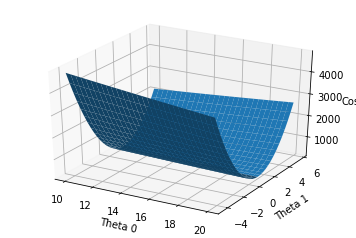

In [61]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(theta_0s, theta_1s, costs)

ax.set_xlabel('Theta 0')
ax.set_ylabel('Theta 1')
ax.set_zlabel('Cost')

plt.show()

### Attempting to visualize gradient descent of both Adam and normal SGD

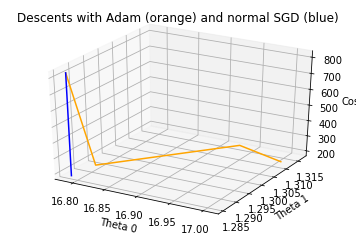

In [62]:
fig = plt.figure()
ax = plt.subplot(111, projection='3d')
ax.set_title('Descents with Adam (orange) and normal SGD (blue)')
ax.set_xlabel('Theta 0')
ax.set_ylabel('Theta 1')
ax.set_zlabel('Cost')

adam_0s = [a['theta'][0] for a in adam_history]
adam_1s = [a['theta'][1] for a in adam_history]
adam_costs = [a['cost'] for a in adam_history]

sgd_0s = [a['theta'][0] for a in sgd_history]
sgd_1s = [a['theta'][1] for a in sgd_history]
sgd_costs = [a['cost'] for a in sgd_history]

ax.plot(adam_0s, adam_1s, adam_costs, color='orange')
ax.plot(sgd_0s, sgd_1s, sgd_costs, color='blue')

plt.show()

Some points of note for our toy example:

- Normal SGD actually converges faster than Adam. This is not what we'd usually expect. However, this is because we used the same learning rate for both Adam and normal SGD. With Adam, we could use a faster learning rate, and it would still converge.
- Adam converges to a more accurate value for theta than with normal SGD, because of the use of momentum and decay.